# Import Libs and Data

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

In [5]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(path = "imdb.npz",
                                                  num_words = None,
                                                  skip_top = 0,
                                                  maxlen = None,
                                                  seed = 113,
                                                  start_char = 1,
                                                  oov_char = 2,
                                                  index_from = 3)

17465344/17464789 [==============================] - 4s 0us/step


# EDA

In [9]:
review_len_train = []
review_len_test = []
for ti, tj in zip(X_train,X_test):
    review_len_train.append(len(ti))
    review_len_test.append(len(tj))

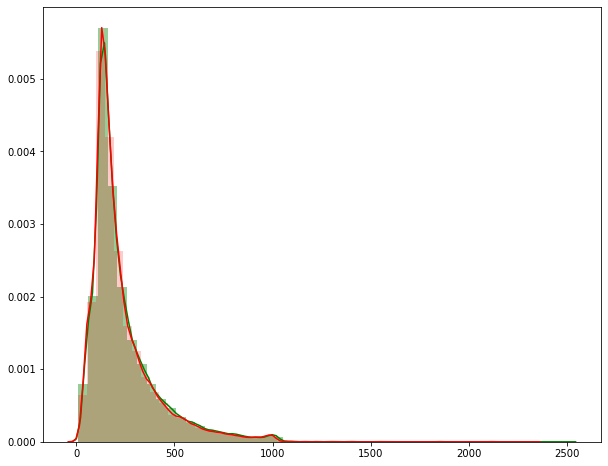

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(review_len_train, color = 'green')
sns.distplot(review_len_test, color = 'red',hist_kws={"alpha":0.2})

In [18]:
print("Train mean:", np.mean(review_len_train))
print("Train median:", np.median(review_len_train))
print("Train mode:", stats.mode(review_len_train))

Train mean: 238.71364
Train median: 178.0
Train mode: ModeResult(mode=array([132]), count=array([196]))


In [19]:
#number of words
word_index = imdb.get_word_index()
print(type(word_index))

1646592/1641221 [==============================] - 1s 0us/step
<class 'dict'>


In [21]:
print(len(word_index))

88584


In [24]:
for keys, values in word_index.items():
    if values == 1 or values == 100 or values == 11111:
        print("{} : {}".format(values,keys))

11111 : income
100 : after
1 : the


In [25]:
def whatItSay(index = 24):
    reverse_index = dict([(value,key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i-3,"!") for i in X_train[index]])
    print(decode_review)
    print(y_train[index])
    return decode_review

In [26]:
decoded_review = whatItSay(36)

! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up
0


# Preprocess

In [30]:
num_words = 20000
maxlen = 150
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

In [31]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [32]:
print(X_train[5])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     1
   778   128    74    12   630   163    15     4  1766  7982  1051     2
    32    85   156    45    40   148   139   121   664   665    10    10
  1361   173     4   749     2    16  3804     8     4   226    65    12
    43   127    24 15344    10    10]


In [33]:
for i in X_train[:10]:
    print(len(i))    

150
150
150
150
150
150
150
150
150
150


In [34]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not mesh br br
0


# Build RNN Model & Train Model

In [35]:
rnn = Sequential()
rnn.add(Embedding(num_words,32,input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences = False, activation = "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss="binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 32)           640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 640,801
Trainable params: 640,801
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
history = rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 5, batch_size = 128, verbose = 1)

Epoch 1/5
196/196 [==============================] - 12s 63ms/step - loss: 0.5698 - accuracy: 0.7257 - val_loss: 0.4925 - val_accuracy: 0.8124
Epoch 2/5
196/196 [==============================] - 13s 67ms/step - loss: 0.3806 - accuracy: 0.8506 - val_loss: 0.3682 - val_accuracy: 0.8428
Epoch 3/5
196/196 [==============================] - 14s 73ms/step - loss: 0.2827 - accuracy: 0.8856 - val_loss: 0.3320 - val_accuracy: 0.8555
Epoch 4/5
196/196 [==============================] - 15s 75ms/step - loss: 0.2353 - accuracy: 0.9065 - val_loss: 0.3561 - val_accuracy: 0.8561
Epoch 5/5
196/196 [==============================] - 15s 75ms/step - loss: 0.2042 - accuracy: 0.9201 - val_loss: 0.3970 - val_accuracy: 0.8450


In [39]:
score = rnn.evaluate(X_test, y_test)
print(" Accuracy : %", score[1]*100)

782/782 [==============================] - 5s 6ms/step - loss: 0.3970 - accuracy: 0.8450
 Accuracy : % 84.50400233268738


## Accuracy and Loss w Epochs

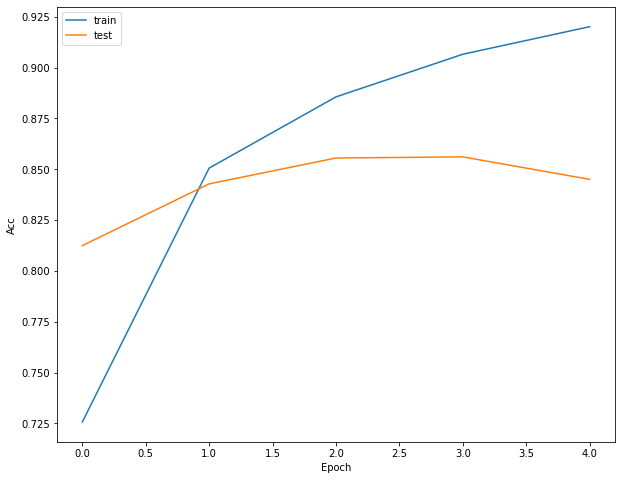

In [42]:
plt.figure(figsize = (10,8))
plt.plot(history.history["accuracy"], label = "train")
plt.plot(history.history["val_accuracy"], label = "test")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

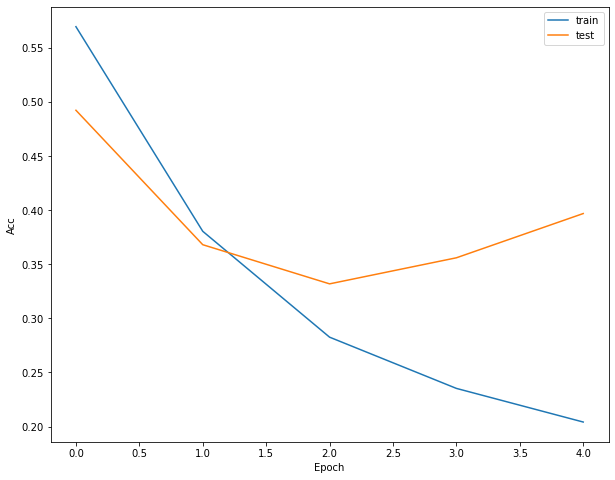

In [43]:
plt.figure(figsize = (10,8))
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()